In [1]:
import sys
sys.path.append('../src')
import pandas as pd
from tqdm import tqdm
DATA_DIR = '../../data'

In [2]:
df = pd.read_csv(f'{DATA_DIR}/Sports_and_Outdoors_5_2016_2018.csv')
df = df[['reviewerID', 'asin']]
df = df.drop_duplicates()
df.head()

,reviewerID,asin
0,ASAE9FBGAJQAH,0899332757
1,A1TAW91SQSU2AH,0899332757
2,A1SVGO4GMEOXQ0,0899332757
3,A36QT6N7N0GF3O,0899332757
4,AJGZDX7KC5TVQ,0899332757


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1315215 entries, 0 to 1366264
Data columns (total 2 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   reviewerID  1315215 non-null  object
 1   asin        1315215 non-null  object
dtypes: object(2)
memory usage: 30.1+ MB


In [4]:
# Transform the dataframe to a transactional dataframe
df = df.groupby('reviewerID')['asin'].apply(list).reset_index(name='items')
df['items'] = df['items'].apply(lambda x: list(set(x)))
df

,reviewerID,items
0,A0001528BGUBOEVR6T5U,[B012ZIGVXE]
1,A0024836TBQJ1WBE4VDY,"[B001CXFHKC, B00AU67NEA, B0179XHY3Q, B00E2217I..."
2,A0029274J35Q1MYNKUWO,"[B000LC5S18, B00HTN4R6O, B000N8LMWY, B000N8MUR..."
3,A0036244LFNO78OM4135,"[B001N3MKT2, B002SK0Y0G, B003BLP0I2, B01BE07ZK..."
4,A0065811S4ANKB4TYHII,"[B0002IMP94, B00OHJDDPY, B004R5V47C]"
...,...,...
262080,AZZW780H8VJ8N,"[B01AAGVWJG, B001O2PKGM, B000O57MPW, B01E4YVCO..."
262081,AZZYI1EW1WY3M,"[B00DDZGCOW, B00T2V9ONW, B000MBNPHC, B00CPJ546..."
262082,AZZYVIRS854I7,"[B006NZ65L4, B0159JSKYE, B00ZK4ZU1U, B00318CLTG]"
262083,AZZYW4YOE1B6E,"[B002WN91Q2, B00HN47G1M, B013CVSXF2, B005YPK9SY]"


In [5]:
df = df.head(100000)

In [6]:
# Count number of unique reviewers
reviewers = df['reviewerID'].unique()
len(reviewers)

100000

In [7]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

In [8]:
# Use the transaction encoder to transform the dataframe to a one-hot encoded boolean dataframe
te = TransactionEncoder()
te_ary = te.fit(df['items']).transform(df['items'])
df_transactions = pd.DataFrame(te_ary, columns=te.columns_)
df_transactions

,0899332757,0899333257,0971100764,1926644425,3843518912,7245456275,7245456313,9877000490,B000002NUS,B000002NUT,...,B01HJ4DN08,B01HJ4EYS8,B01HJ8YC0Y,B01HJA241G,B01HJA7KWE,B01HJDGJ1E,B01HJDHNX2,B01HJDZ34I,B01HJGAJ9O,B01HJHHBHG
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
# Save df as transactions.csv
# df_transactions.to_csv(f'{DATA_DIR}/transactions.csv', index=False)

In [10]:
# Time the apriori algorithm
import time
start = time.time()
frequent_itemsets = apriori(df_transactions, min_support=0.002, use_colnames=True)
end = time.time()
print(f'Apriori took {end - start} seconds')
# Save frequent itemsets as frequent_itemsets_apriori.csv
frequent_itemsets.to_csv(f'{DATA_DIR}/frequent_itemsets_apriori.csv', index=False)
frequent_itemsets

Apriori took 15.742182970046997 seconds


,support,itemsets
0,0.00457,(B00079ULA8)
1,0.00320,(B000MF63M2)
2,0.00508,(B000VAPCU2)
3,0.00258,(B0012Q2S4W)
4,0.00461,(B00136X6VU)
...,...,...
140,0.00214,"(B00VHX8G5A, B00N3XXXCS, B016UQXB5I, B016UQXB26)"
141,0.00214,"(B00PD8JOTW, B016UQXB26, B016UQXB5I, B00VHX8G5A)"
142,0.00515,"(B00TZ900I4, B00RM8I0LE, B00SI9UB7M, B00SK74C5Y)"
143,0.00507,"(B000VAPCU2, B00RM8I0LE, B00SK74C5Y, B00TZ900I..."


<Axes: >

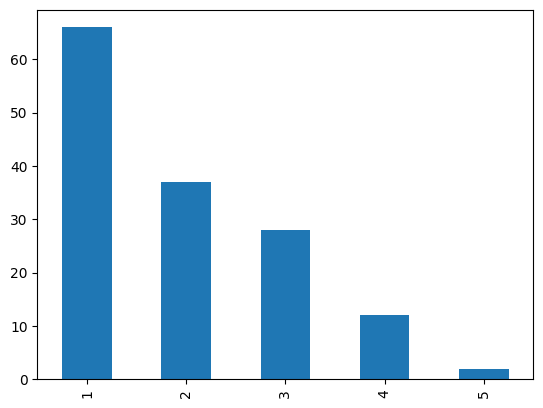

In [11]:
# Plot distribution of length of frequent itemsets
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets['length'].value_counts().plot.bar()

In [12]:
# Transform df to row series
reviewed_series = df['items'].explode()
reviewed_series = reviewed_series.groupby(reviewed_series.index).apply(list)

In [13]:
from skmine.itemsets import LCM

In [14]:
n = len(reviewed_series)
ratio = 0.002
min_supp = int(n * ratio)

print(f'Minimum support: {min_supp}')
lcm = LCM(min_supp=min_supp)
start = time.time()
closed_pattern = lcm.fit_transform(reviewed_series)
end = time.time()
print(f'LCM took {end - start} seconds')
closed_pattern.to_csv(f'{DATA_DIR}/closed_pattern_LCM.csv', index=False)
closed_pattern

Minimum support: 200
LCM took 0.33078527450561523 seconds


,itemset,support
0,"[B00RM8I0LE, B00SI9UB7M, B00SK74C5Y, B00TZ900I4]",515
1,[B001T7QJ9O],508
2,[B000VAPCU2],508
3,"[B000VAPCU2, B00RM8I0LE, B00SI9UB7M, B00SK74C5...",507
4,"[B00136X6VU, B0015LT03G, B0015LY0DG]",461
...,...,...
59,"[B00WQCP6GS, B014W9SY4I]",211
60,[B0072T3X38],208
61,[B003WU9VKK],201
62,[B00KQSVRF8],200


<Axes: >

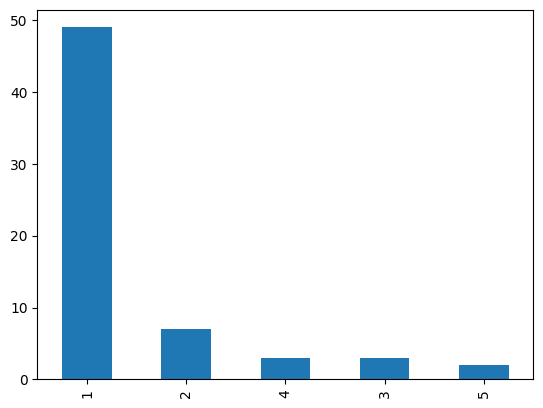

In [15]:
# Plot distribution of length of closed itemsets
closed_pattern['length'] = closed_pattern['itemset'].apply(lambda x: len(x))
closed_pattern['length'].value_counts().plot.bar()

In [16]:
# Extract association rules from the dataframe
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(B00136X6VU),(B00079ULA8),0.00461,0.00457,0.00457,0.991323,216.919740,0.004549,114.723307,1.00000
1,(B00079ULA8),(B00136X6VU),0.00457,0.00461,0.00457,1.000000,216.919740,0.004549,inf,0.99996
2,(B0015LT03G),(B00079ULA8),0.00461,0.00457,0.00457,0.991323,216.919740,0.004549,114.723307,1.00000
3,(B00079ULA8),(B0015LT03G),0.00457,0.00461,0.00457,1.000000,216.919740,0.004549,inf,0.99996
4,(B0015LY0DG),(B00079ULA8),0.00461,0.00457,0.00457,0.991323,216.919740,0.004549,114.723307,1.00000
...,...,...,...,...,...,...,...,...,...,...
465,(B00PD8JOTW),"(B00N3XXXCS, B016UQXB26, B016UQXB5I, B00VHX8G5A)",0.00214,0.00214,0.00214,1.000000,467.289720,0.002135,inf,1.00000
466,(B00VHX8G5A),"(B00PD8JOTW, B016UQXB26, B016UQXB5I, B00N3XXXCS)",0.00215,0.00214,0.00214,0.995349,465.116279,0.002135,214.539900,1.00000
467,(B00N3XXXCS),"(B00PD8JOTW, B016UQXB26, B016UQXB5I, B00VHX8G5A)",0.00214,0.00214,0.00214,1.000000,467.289720,0.002135,inf,1.00000
468,(B016UQXB26),"(B00PD8JOTW, B00N3XXXCS, B016UQXB5I, B00VHX8G5A)",0.00215,0.00214,0.00214,0.995349,465.116279,0.002135,214.539900,1.00000


In [17]:
# Rename the column itemset to itemsets in closed pattern dataframe
closed_pattern = closed_pattern.rename(columns={'itemset': 'itemsets'})
closed_pattern['support'] = closed_pattern['support'] / len(df)
closed_pattern

,itemsets,support,length
0,"[B00RM8I0LE, B00SI9UB7M, B00SK74C5Y, B00TZ900I4]",0.00515,4
1,[B001T7QJ9O],0.00508,1
2,[B000VAPCU2],0.00508,1
3,"[B000VAPCU2, B00RM8I0LE, B00SI9UB7M, B00SK74C5...",0.00507,5
4,"[B00136X6VU, B0015LT03G, B0015LY0DG]",0.00461,3
...,...,...,...
59,"[B00WQCP6GS, B014W9SY4I]",0.00211,2
60,[B0072T3X38],0.00208,1
61,[B003WU9VKK],0.00201,1
62,[B00KQSVRF8],0.00200,1


In [18]:
# Extract association rules from closed pattern dataframe
rules = association_rules(closed_pattern, metric="confidence", min_threshold=0.001, support_only=True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(B00RM8I0LE, B00TZ900I4, B00SI9UB7M)",(B00SK74C5Y),NaN,NaN,0.00515,NaN,NaN,NaN,NaN,NaN
1,"(B00RM8I0LE, B00TZ900I4, B00SK74C5Y)",(B00SI9UB7M),NaN,NaN,0.00515,NaN,NaN,NaN,NaN,NaN
2,"(B00TZ900I4, B00SI9UB7M, B00SK74C5Y)",(B00RM8I0LE),NaN,NaN,0.00515,NaN,NaN,NaN,NaN,NaN
3,"(B00RM8I0LE, B00SI9UB7M, B00SK74C5Y)",(B00TZ900I4),NaN,NaN,0.00515,NaN,NaN,NaN,NaN,NaN
4,"(B00RM8I0LE, B00TZ900I4)","(B00SI9UB7M, B00SK74C5Y)",NaN,NaN,0.00515,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
129,(B016UQXB26),"(B00PD8JOTW, B00N3XXXCS, B016UQXB5I, B00VHX8G5A)",NaN,NaN,0.00214,NaN,NaN,NaN,NaN,NaN
130,(B00N3XXXCS),"(B00PD8JOTW, B016UQXB26, B016UQXB5I, B00VHX8G5A)",NaN,NaN,0.00214,NaN,NaN,NaN,NaN,NaN
131,(B016UQXB5I),"(B00PD8JOTW, B00N3XXXCS, B016UQXB26, B00VHX8G5A)",NaN,NaN,0.00214,NaN,NaN,NaN,NaN,NaN
132,(B014W9SY4I),(B00WQCP6GS),NaN,NaN,0.00211,NaN,NaN,NaN,NaN,NaN


In [19]:
# Change the rules['antecedents'] and rules['consequents'] columns to lists
rules['antecedents'] = rules['antecedents'].apply(lambda x: list(x))
rules['consequents'] = rules['consequents'].apply(lambda x: list(x))

In [20]:
rules[rules['confidence'] >= 1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [21]:
# Compress the data using associations rules
def compress_data(database, association_rules, threshold=0.7):
    """
    Compress the database using association rules.
    :param database: pandas.DataFrame: the database to compress
    :param association_rules: pandas.DataFrame: the association rules
    :param threshold: float: the minimum confidence threshold
    :return: pandas.DataFrame: the compressed database
    """
    compressed_data = []
    # Keep only rules with confidence above threshold
    association_rules = association_rules[association_rules['confidence'] > threshold]
    anteriors = association_rules['antecedents'].apply(lambda x: list(x)).tolist()
    consequents = association_rules['consequents'].apply(lambda x: list(x)).tolist()
    print(f'Number of anteriors:  {len(anteriors)}')

    nb_items_compressed = 0
    # Iterate over transactions without header
    for i in tqdm(range(0, len(database))):
        transaction = database.iloc[i, :].dropna().tolist()
        user = transaction[0]
        items = transaction[1]
        compressed_transaction = []

        # Check if an itemset is in the transaction
        for (anterior, consequent) in zip(anteriors, consequents):
            pattern = anterior + consequent
            if all(item in items for item in pattern):
                compressed_transaction.extend(anterior)
                items = [item for item in items if item not in pattern]
                nb_items_compressed += len(pattern)
        compressed_transaction.extend(items)

        compressed_data.append([user, compressed_transaction])
    print(f'Number of items compressed: {nb_items_compressed}')
    print(f'Compression ratio: {nb_items_compressed / len(database)}')
    print(f'Original database information: {database.info()}')
    compressed_data = pd.DataFrame(compressed_data, columns=['reviewerID', 'items'])
    print(f'Compressed database information: {compressed_data.info()}')

    return compressed_data

compressed_data = compress_data(df, rules)
compressed_data

Number of anteriors:  0


100%|██████████| 100000/100000 [00:11<00:00, 8795.64it/s]


Number of items compressed: 0
Compression ratio: 0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   reviewerID  100000 non-null  object
 1   items       100000 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB
Original database information: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   reviewerID  100000 non-null  object
 1   items       100000 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB
Compressed database information: None


,reviewerID,items
0,A0001528BGUBOEVR6T5U,[B012ZIGVXE]
1,A0024836TBQJ1WBE4VDY,"[B001CXFHKC, B00AU67NEA, B0179XHY3Q, B00E2217I..."
2,A0029274J35Q1MYNKUWO,"[B000LC5S18, B00HTN4R6O, B000N8LMWY, B000N8MUR..."
3,A0036244LFNO78OM4135,"[B001N3MKT2, B002SK0Y0G, B003BLP0I2, B01BE07ZK..."
4,A0065811S4ANKB4TYHII,"[B0002IMP94, B00OHJDDPY, B004R5V47C]"
...,...,...
99995,A2G8JSI5SSVQR3,"[B00BMPT8E6, B001EYHLOE, B01ADBBW52, B003GSUM5..."
99996,A2G8KEZ4TPRPQL,"[B00KWKA3L4, B01H7X5YYY, B00ZPCWM3G, B010ULN8Y..."
99997,A2G8KZPYCK3Z7V,[B004E2C20Q]
99998,A2G8LCN8AH7S78,"[B00O3YNZME, B014IEHPYC]"
